In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn

In [689]:
data = pd.read_csv("train.csv")
data1 = pd.read_csv("test.csv")
data.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


<AxesSubplot:>

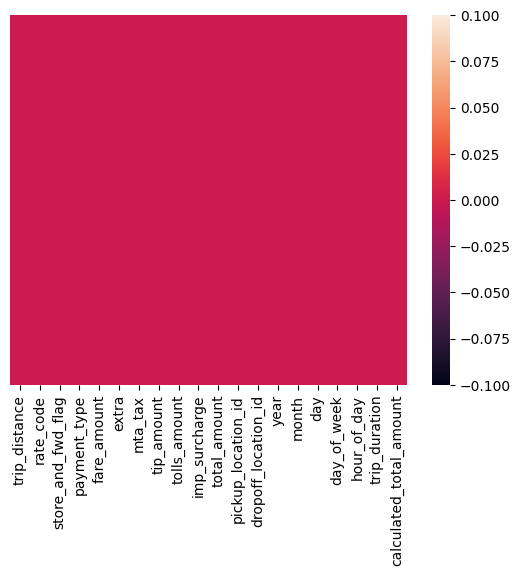

In [690]:
sbn.heatmap(data.isnull(),yticklabels=False)

In [691]:
data.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,1.110086,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,152.543943,146.852200,2018.0,6.132429,15.337743,2.885200,13.803657,2257.38360,41.324249
std,4.496854,0.581456,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,59.764598,76.373292,0.0,3.342088,8.691250,1.926999,6.224485,5112.41526,19.167043
min,0.010000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.00000,0.310000
25%,6.470000,1.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1448.00000,30.300000
50%,8.700000,1.000000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1862.00000,38.460000
75%,10.990000,1.000000,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,186.000000,229.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2340.00000,48.200000
max,79.010000,5.000000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,265.000000,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,86347.00000,468.350000


In [692]:
data.dtypes

trip_distance              float64
rate_code                    int64
store_and_fwd_flag          object
payment_type                 int64
fare_amount                float64
extra                      float64
mta_tax                    float64
tip_amount                 float64
tolls_amount               float64
imp_surcharge              float64
total_amount               float64
pickup_location_id           int64
dropoff_location_id          int64
year                         int64
month                        int64
day                          int64
day_of_week                  int64
hour_of_day                  int64
trip_duration              float64
calculated_total_amount    float64
dtype: object

In [693]:
data["store_and_fwd_flag"].value_counts()

N    34823
Y      177
Name: store_and_fwd_flag, dtype: int64

In [694]:
data.corr()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
trip_distance,1.000000,0.273355,-0.060372,0.829692,-0.016118,-0.270702,0.455714,0.432261,-0.000183,0.816478,-0.094002,-0.092665,NaN,-0.035207,-0.007886,-0.001131,-0.023668,-0.003486,0.001392
rate_code,0.273355,1.000000,-0.002726,0.543670,-0.080895,-0.692998,0.268014,0.318800,-0.049447,0.531029,0.005835,-0.003110,NaN,0.017861,0.007309,0.015818,-0.033840,-0.004011,-0.011716
payment_type,-0.060372,-0.002726,1.000000,-0.066491,0.006365,0.001486,-0.491274,-0.086443,0.004975,-0.179079,0.001166,-0.002771,NaN,0.007847,0.029884,0.071458,-0.039133,-0.008933,-0.040477
fare_amount,0.829692,0.543670,-0.066491,1.000000,-0.057712,-0.461236,0.516761,0.430221,-0.026675,0.958428,-0.059885,-0.065842,NaN,-0.000127,0.006167,-0.012430,-0.020998,-0.004027,-0.004883
extra,-0.016118,-0.080895,0.006365,-0.057712,1.000000,0.047640,-0.018170,-0.065128,0.007239,-0.039287,-0.009397,-0.022558,NaN,-0.003911,-0.006703,-0.106173,0.320355,0.004950,0.004083
mta_tax,-0.270702,-0.692998,0.001486,-0.461236,0.047640,1.000000,-0.273454,-0.448595,0.048335,-0.492964,-0.017613,0.151476,NaN,0.001563,-0.008550,-0.011898,0.045090,0.008558,0.001764
tip_amount,0.455714,0.268014,-0.491274,0.516761,-0.018170,-0.273454,1.000000,0.399708,-0.002809,0.695904,-0.029003,-0.025302,NaN,-0.026451,-0.010239,-0.048319,0.008729,0.000827,0.021426
tolls_amount,0.432261,0.318800,-0.086443,0.430221,-0.065128,-0.448595,0.399708,1.000000,0.005692,0.602555,-0.014116,-0.035023,NaN,-0.016343,0.003878,-0.049999,-0.027309,0.004057,0.000835
imp_surcharge,-0.000183,-0.049447,0.004975,-0.026675,0.007239,0.048335,-0.002809,0.005692,1.000000,-0.019369,-0.002914,-0.007065,NaN,-0.004881,0.005432,-0.008182,0.003125,0.000756,-0.008944
total_amount,0.816478,0.531029,-0.179079,0.958428,-0.039287,-0.492964,0.695904,0.602555,-0.019369,1.000000,-0.055183,-0.062446,NaN,-0.009185,0.002919,-0.032199,-0.012291,-0.001971,0.001413


In [695]:
data["rate_code"].value_counts()

1    33664
3      650
5      501
4      182
2        3
Name: rate_code, dtype: int64

In [696]:
data["payment_type"].value_counts()

1    30899
2     3926
3      132
4       43
Name: payment_type, dtype: int64

In [697]:
data["extra"].value_counts()

0.0     18139
0.5     11401
1.0      5454
17.5        2
1.5         2
18.5        1
0.8         1
Name: extra, dtype: int64

In [698]:
data["mta_tax"].value_counts()

0.5    34085
0.0      915
Name: mta_tax, dtype: int64

In [699]:
data["imp_surcharge"].value_counts()

0.3    34993
0.0        7
Name: imp_surcharge, dtype: int64

In [700]:
# data = pd.get_dummies(data, columns = ['rate_code'], drop_first=False)
# data = pd.get_dummies(data, columns = ['payment_type'], drop_first=False)
# # data = pd.get_dummies(data, columns = ['store_and_fwd_flag'], drop_first=False)
# data = pd.get_dummies(data, columns = ['extra'], drop_first=False)
# data = pd.get_dummies(data, columns = ['mta_tax'], drop_first=False)
# # data = pd.get_dummies(data, columns = ['imp_surcharge'], drop_first=False)

In [701]:
# data1 = pd.get_dummies(data1, columns = ['rate_code'], drop_first=False)
# data1 = pd.get_dummies(data1, columns = ['payment_type'], drop_first=False)
# # data1 = pd.get_dummies(data1, columns = ['store_and_fwd_flag'], drop_first=False)
# data1 = pd.get_dummies(data1, columns = ['extra'], drop_first=False)
# data1 = pd.get_dummies(data1, columns = ['mta_tax'], drop_first=False)
# # data1 = pd.get_dummies(data1, columns = ['imp_surcharge'], drop_first=False)

In [702]:
# def Quantiling(d):
#     x1 = d.quantile(0.001)
#     x2 = d.quantile(0.999)
#     d = d.loc()

In [703]:
data.drop(["year","fare_amount","day","month","store_and_fwd_flag","imp_surcharge","pickup_location_id","dropoff_location_id"], inplace=True, axis=1)
data1.drop(["year","fare_amount","day","month","store_and_fwd_flag","imp_surcharge","pickup_location_id","dropoff_location_id"], inplace=True, axis=1)

In [704]:
data.corr()

,trip_distance,rate_code,payment_type,extra,mta_tax,tip_amount,tolls_amount,total_amount,day_of_week,hour_of_day,trip_duration,calculated_total_amount
trip_distance,1.000000,0.273355,-0.060372,-0.016118,-0.270702,0.455714,0.432261,0.816478,-0.001131,-0.023668,-0.003486,0.001392
rate_code,0.273355,1.000000,-0.002726,-0.080895,-0.692998,0.268014,0.318800,0.531029,0.015818,-0.033840,-0.004011,-0.011716
payment_type,-0.060372,-0.002726,1.000000,0.006365,0.001486,-0.491274,-0.086443,-0.179079,0.071458,-0.039133,-0.008933,-0.040477
extra,-0.016118,-0.080895,0.006365,1.000000,0.047640,-0.018170,-0.065128,-0.039287,-0.106173,0.320355,0.004950,0.004083
mta_tax,-0.270702,-0.692998,0.001486,0.047640,1.000000,-0.273454,-0.448595,-0.492964,-0.011898,0.045090,0.008558,0.001764
tip_amount,0.455714,0.268014,-0.491274,-0.018170,-0.273454,1.000000,0.399708,0.695904,-0.048319,0.008729,0.000827,0.021426
tolls_amount,0.432261,0.318800,-0.086443,-0.065128,-0.448595,0.399708,1.000000,0.602555,-0.049999,-0.027309,0.004057,0.000835
total_amount,0.816478,0.531029,-0.179079,-0.039287,-0.492964,0.695904,0.602555,1.000000,-0.032199,-0.012291,-0.001971,0.001413
day_of_week,-0.001131,0.015818,0.071458,-0.106173,-0.011898,-0.048319,-0.049999,-0.032199,1.000000,-0.056879,0.002499,0.000730
hour_of_day,-0.023668,-0.033840,-0.039133,0.320355,0.045090,0.008729,-0.027309,-0.012291,-0.056879,1.000000,-0.005418,0.001093


In [705]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [706]:
x = data.drop(["calculated_total_amount"],axis=1)
y = data["calculated_total_amount"]

In [707]:
x1, x2, y1, y2 = train_test_split(x,y,test_size=0.3,random_state=101)

In [708]:
model = Ridge()
model.fit(x1,y1)

Ridge()

In [709]:
predictions = model.predict(x2)

In [710]:
err = mean_squared_error(y2,predictions)
err

398.3845976691731

In [711]:
x2

,trip_distance,rate_code,payment_type,extra,mta_tax,tip_amount,tolls_amount,total_amount,day_of_week,hour_of_day,trip_duration
6606,9.07,1,1,1.0,0.5,7.70,0.0,38.50,1,19,2274.0
29983,12.51,1,2,0.5,0.5,0.00,0.0,34.80,3,21,1157.0
11393,6.46,1,1,0.5,0.5,5.06,0.0,30.36,3,1,1130.0
381,6.60,1,1,0.5,0.5,4.50,0.0,31.30,5,0,1973.0
9221,7.40,1,1,0.0,0.5,5.15,0.0,30.95,0,8,1941.0
...,...,...,...,...,...,...,...,...,...,...,...
19967,5.99,1,1,0.0,0.5,2.80,0.0,31.60,4,10,2085.0
25317,8.14,1,1,0.0,0.5,7.00,0.0,42.80,2,14,1559.0
13958,3.80,1,1,0.0,0.5,4.00,0.0,29.80,0,10,2220.0
4393,3.90,1,1,0.0,0.5,4.45,0.0,26.75,2,10,1779.0


In [712]:
prediction = model.predict(data1)

In [713]:
prediction

array([39.67719312, 41.91350623, 41.66074601, ..., 41.4863194 ,
       41.53530532, 41.74856921])

In [714]:
final_data = pd.DataFrame()
final_data["calculated_total_amount"] = prediction

In [715]:
final_data.to_csv("predictions.csv")